In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("18-concrete_data.csv")

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

<Axes: xlabel='Cement', ylabel='Strength'>

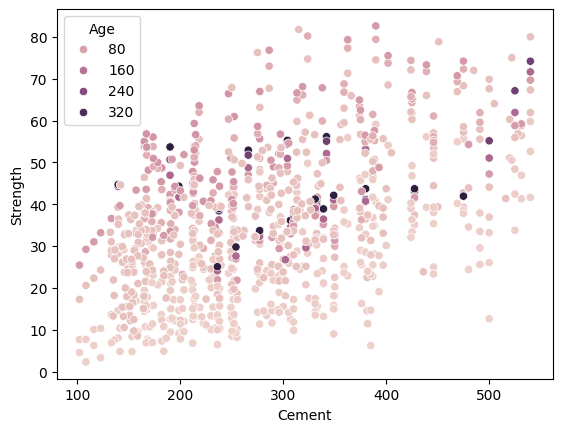

In [10]:
sns.scatterplot(df, x="Cement",y="Strength", hue="Age")

In [11]:
X = df.drop("Strength", axis=1)
y = df["Strength"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=15)

In [16]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [17]:
y_train

919    25.10
641    12.73
535    48.85
835    15.42
583    37.81
       ...  
85     28.60
667    39.32
156    72.99
384    41.37
645    19.54
Name: Strength, Length: 772, dtype: float64

In [23]:
y2 = y_train - tree_reg1.predict(X_train)

In [24]:
y2[:5]

919   -15.044359
641    -2.967000
535     2.098039
835   -10.123407
583    -2.334359
Name: Strength, dtype: float64

In [27]:
tree_reg2 = DecisionTreeRegressor(max_depth=4)
tree_reg2.fit(X_train, y2)
y3= y2 - tree_reg2.predict(X_train)
y3[:5]

919   -7.776773
641   -0.353441
535    9.365625
835   -4.303430
583   -3.033962
Name: Strength, dtype: float64

In [30]:
tree_reg3 = DecisionTreeRegressor(max_depth=4)
tree_reg3.fit(X_train, y3)
y4 = y3-tree_reg3.predict(X_train)
y4[:5]

919   -8.311212
641   -0.887880
535    8.831186
835   -0.209931
583   -0.406351
Name: Strength, dtype: float64

In [31]:
from sklearn.metrics import r2_score

In [32]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [33]:
r2_score(y_test, y_pred)

0.8159494658632221

In [34]:
tree_reg4 = DecisionTreeRegressor(max_depth=4)

In [36]:
tree_reg4.fit(X_train, y4)

DecisionTreeRegressor(max_depth=4)

In [37]:
y5 = y4-tree_reg4.predict(X_train)

In [38]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3, tree_reg4))

In [39]:
r2_score(y_test, y_pred)

0.8164029936095348

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
gbr = GradientBoostingRegressor(n_estimators=3, max_depth=3, learning_rate=0.1)
gbr.fit(X_train, y_train)
print(r2_score(y_test, gbr.predict(X_test)))

0.31671418229216797


In [44]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gbr.fit(X_train, y_train)
print(r2_score(y_test, gbr.predict(X_test)))

0.9247306198159041


In [45]:
gbr = GradientBoostingRegressor(n_estimators=200, max_depth=3, learning_rate=0.1)
gbr.fit(X_train, y_train)
print(r2_score(y_test, gbr.predict(X_test)))

0.9379130340486093


In [46]:
gbr = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
gbr.fit(X_train, y_train)
print(r2_score(y_test, gbr.predict(X_test)))

0.9446665770131373


In [47]:
gbr = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=0.1)
gbr.fit(X_train, y_train)
print(r2_score(y_test, gbr.predict(X_test)))

0.949337823225624


In [56]:
params = {
    "n_estimators": [100,150,200],
    "max_depth": [3,4,5],
    "loss": ["squared_error", "absolute_error","huber","quantile"],
    "learning_rate":[0.01, 0.1, 0.5]
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
grid = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=params)

In [66]:
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [67]:
grid.best_params_

{'n_estimators': 150, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.5}

In [68]:
r2_score(y_test, y_pred)

0.9447746211985149